In [1]:

import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt



### Data processing


In [2]:
#LOAD The data
path = 'dataset_mood_smartphone.csv'
df = pd.read_csv(path, header=0, sep=',', index_col=0)

#Split time column into time and date
date, time = df['time'].str.split(' ', 1).str
df.drop(labels=['time'], axis=1,inplace = True)
df.insert(1, 'date', date)
df.insert(2, 'time', time)

#sort on id and date
df = df.sort_values(by=['id', 'date'])

#Get the unique id's and data variables
ids = df.id.unique()
inputs = df.variable.unique()
uniquedays = df.date.unique()


In [3]:
#function to merge the days of the variables per patient  ##Note takes a while to complete
def mergedays(df):
    table = pd.DataFrame(columns=['id','date', 'variable', 'value'])
    ids = df.id.unique()
    #Rebuild the dataframe for every patient, day , variable
    i = 0
    for patientid in ids:
        patientdata = df.loc[df['id'] == patientid]
        days = patientdata.date.unique()
        for day in days:
            daydata = patientdata.loc[patientdata['date'] == day]
            variables = daydata.variable.unique()
            for var in variables:
                if var == 'mood' or var == 'circumplex.arousal' or var == 'circumplex.valence':
                    value = daydata.loc[daydata['variable'] == var].mean()[0]
                elif var == 'activity':
                    value = daydata.loc[daydata['variable'] == var].max()[4]
                else:
                    #note due to sum suming over all indexing is needed
                    value = daydata.loc[daydata['variable'] == var].sum()[4]

                #print([patientid,day,var,value])
                table.loc[i] = [patientid,day,var,value]
                i+=1
    return table

In [4]:
#STATUS PRINTS      #NOTE before cleaning
print("STATISTICS")
print("The amount of unique ids are: ", len(ids), "\n", ids)
print("Amount of unique days are: ", len(uniquedays), "\n", uniquedays)
print("\nThe variables used are:\n", inputs)

print("\nErrors are within:  circumplex.valence 156 NA & circumplex.arousal 46 NA")
print("The count and amount of data inputs do not match")

print("\nHow many data points per id:")
datalist = []
for i in ids:
    datalist.append(len(df.loc[df['id'] == i]))
    print(i, " amount of data inputs: ", len(df.loc[df['id'] == i]))

vardatalist = []
print("\nHow often are the variables used:")
for j in inputs:
    vardatalist.append(len(df.loc[df['variable'] == j]))
    print(j, "\nAmount of data inputs: ", len(df.loc[df['variable'] == j]))
    print(df.loc[df['variable'] == j].describe(),"\n")
    
    



STATISTICS
The amount of unique ids are:  27 
 ['AS14.01' 'AS14.02' 'AS14.03' 'AS14.05' 'AS14.06' 'AS14.07' 'AS14.08'
 'AS14.09' 'AS14.12' 'AS14.13' 'AS14.14' 'AS14.15' 'AS14.16' 'AS14.17'
 'AS14.19' 'AS14.20' 'AS14.23' 'AS14.24' 'AS14.25' 'AS14.26' 'AS14.27'
 'AS14.28' 'AS14.29' 'AS14.30' 'AS14.31' 'AS14.32' 'AS14.33']
Amount of unique days are:  113 
 ['2014-02-17' '2014-02-18' '2014-02-19' '2014-02-20' '2014-02-21'
 '2014-02-22' '2014-02-25' '2014-02-26' '2014-02-27' '2014-02-28'
 '2014-03-01' '2014-03-03' '2014-03-05' '2014-03-06' '2014-03-07'
 '2014-03-10' '2014-03-11' '2014-03-12' '2014-03-13' '2014-03-14'
 '2014-03-15' '2014-03-16' '2014-03-17' '2014-03-18' '2014-03-19'
 '2014-03-20' '2014-03-21' '2014-03-22' '2014-03-23' '2014-03-24'
 '2014-03-25' '2014-03-26' '2014-03-27' '2014-03-28' '2014-03-29'
 '2014-03-30' '2014-03-31' '2014-04-01' '2014-04-02' '2014-04-03'
 '2014-04-04' '2014-04-05' '2014-04-06' '2014-04-07' '2014-04-08'
 '2014-04-09' '2014-04-10' '2014-04-11' '2014-04-1

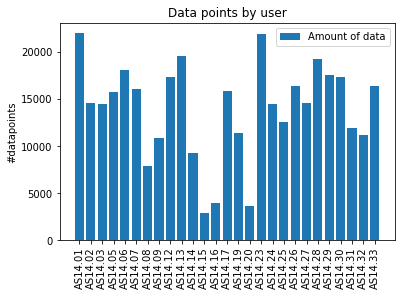

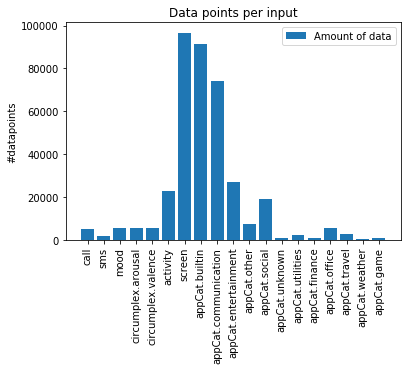

In [5]:
#plot the data points per id
fig, ax = plt.subplots()
ax.bar(np.arange(len(ids)),datalist,0.8,label='Amount of data')
ax.set_ylabel('#datapoints')
ax.set_title('Data points by user')
ax.set_xticks(np.arange(len(ids)))
ax.set_xticklabels(('AS14.01','AS14.02','AS14.03','AS14.05','AS14.06','AS14.07','AS14.08'
 ,'AS14.09', 'AS14.12', 'AS14.13','AS14.14','AS14.15','AS14.16','AS14.17',
 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24', 'AS14.25', 'AS14.26','AS14.27',
 'AS14.28', 'AS14.29', 'AS14.30','AS14.31','AS14.32','AS14.33'),rotation='vertical')
ax.legend()
plt.show()


#plot data points per variable
fig, bx = plt.subplots()
bx.bar(np.arange(len(inputs)),vardatalist,0.8,label='Amount of data')
bx.set_ylabel('#datapoints')
bx.set_title('Data points per input')
bx.set_xticks(np.arange(len(inputs)))
bx.set_xticklabels(('call','sms','mood','circumplex.arousal','circumplex.valence','activity'
 ,'screen','appCat.builtin','appCat.communication','appCat.entertainment'
 ,'appCat.other','appCat.social','appCat.unknown','appCat.utilities'
 ,'appCat.finance','appCat.office','appCat.travel','appCat.weather'
 ,'appCat.game'),rotation='vertical')
bx.legend()
plt.show()

In [6]:
#days over patients


In [7]:
# Clean data from NA
df = df.dropna(axis=0, how='any')

###Check to see the cleaning result
# print("\nHow often are the variables used:")
# for j in inputs:
#     print(j, "\nAmount of data inputs: ", len(df.loc[df['variable'] == j]))
#     print(df.loc[df['variable'] == j].describe(),"\n")
###
print(df)

              id        date          time            variable   value
136471   AS14.01  2014-02-17  12:04:42.394                call   1.000
136472   AS14.01  2014-02-17  18:28:25.520                call   1.000
136473   AS14.01  2014-02-18  09:29:51.257                call   1.000
136474   AS14.01  2014-02-19  14:43:30.575                call   1.000
136475   AS14.01  2014-02-19  17:29:10.378                call   1.000
136476   AS14.01  2014-02-19  17:42:16.499                call   1.000
136477   AS14.01  2014-02-19  17:43:18.061                call   1.000
136478   AS14.01  2014-02-19  17:44:01.594                call   1.000
136479   AS14.01  2014-02-19  18:07:50.055                call   1.000
136480   AS14.01  2014-02-19  18:10:06.385                call   1.000
141710   AS14.01  2014-02-19  17:42:34.292                 sms   1.000
141711   AS14.01  2014-02-19  21:25:04.397                 sms   1.000
136481   AS14.01  2014-02-20  13:42:05.309                call   1.000
136482

In [8]:
#Write / load the data

fname = "adjusted_data.csv"
my_file = Path(fname)
if my_file.exists():
    print("file found, loading in now")
    df = pd.read_csv(fname, header=0, sep=',', index_col=0)
else:
    print("file not found")
    df = mergedays(df)
    df.to_csv(fname, sep=',')
    print("writing completed")

print(df)

file found, loading in now
            id        date              variable        value
0      AS14.01  2014-02-17                  call     2.000000
1      AS14.01  2014-02-18                  call     1.000000
2      AS14.01  2014-02-19                  call     7.000000
3      AS14.01  2014-02-19                   sms     2.000000
4      AS14.01  2014-02-20                  call     2.000000
5      AS14.01  2014-02-20                   sms     3.000000
6      AS14.01  2014-02-21                   sms     1.000000
7      AS14.01  2014-02-22                  call     2.000000
8      AS14.01  2014-02-22                   sms     1.000000
9      AS14.01  2014-02-25                  call     3.000000
10     AS14.01  2014-02-26                  mood     6.250000
11     AS14.01  2014-02-26    circumplex.arousal    -0.250000
12     AS14.01  2014-02-26    circumplex.valence     0.750000
13     AS14.01  2014-02-26                  call     1.000000
14     AS14.01  2014-02-26                 

In [9]:
# Feli
#TODO benchmark x=y 


In [10]:
#Model one  Michael





In [11]:
import datetime

# creates table, row: timesteps 0,..,T, columns variables
def create_table_for_patient(df, patient_id):
    # Only get rows for patient_id
    df_pat = df.loc[df['id'] == patient_id ]
    
    # Calculate num_days all measurements come from
    date_format = "%Y-%m-%d"
    pat_start_date = datetime.datetime.strptime(df_pat.loc[ df_pat.head(1).index[0], 'date'], date_format)
    pat_end_date = datetime.datetime.strptime(df_pat.loc[ df_pat.tail(1).index[0], 'date'], date_format)
    num_days = (pat_end_date - pat_start_date).days + 1

    # all except mood
    q = ['circumplex.arousal', 'circumplex.valence',
         'activity', 'screen', 'call', 'sms',
         'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance',
         'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social',
         'appCat.travel', 'appCat.unknown', 'appCat.utilities', 'appCat.weather']

    # Create df_pat_table for num_days containing all measurements
    # missing values for mood are set to -1
    df_pat_table = pd.DataFrame(-1, index=range(0,num_days), columns=['mood'])

    # not mentioned values are assumed to be 0
    for var in q:
        df_pat_table[var] = 0.0

    # fill in the table
    for index,rows in df_pat.iterrows():
        cur_date = rows['date']
        t = (datetime.datetime.strptime(cur_date, date_format) - pat_start_date).days
    
        cur_row_var = rows['variable']
        cur_row_val = rows['value']
    
        if cur_row_var in (q+['mood']):
            df_pat_table.loc[t, cur_row_var] = cur_row_val

    return df_pat_table

# example: df_q = create_table_for_patient(df, 'AS14.13')


In [12]:
# Returns features for a given slice of timestep table (of size window)
def feature_creation(df_time_history):
    # uses window of size 3
    window = df_time_history.shape[0]
    
    # df_time_history is df of indices t-window,...,t-1,
    # df_time_history.iloc[-k] gives you exactly row corresponding to row t-k of df df_time_history
    
    # mood at previous day, estimates for diff/change of diff of mood in window based finite difference method,
    # and avg mood during window
    prev_mood = df_time_history.iloc[-1]['mood']
    mood_diff = df_time_history.iloc[-1]['mood'] - df_time_history.iloc[-2]['mood']
    mood_change = df_time_history.iloc[-1]['mood'] - 2*df_time_history.iloc[-2]['mood'] + df_time_history.iloc[-3]['mood']
    avg_mood = sum(np.array(df_time_history.loc[:,'mood'])) / window
    
    # circumplex arousal and valence of previous day
    prev_circ_arousal = df_time_history.iloc[-1]['circumplex.arousal']
    prev_circ_valence = df_time_history.iloc[-1]['circumplex.valence']
    
    # total number of sms and calls during window
    sms_list = np.array(df_time_history.loc[:,'sms'])
    call_list = np.array(df_time_history.loc[:,'call'])
    tot_sms = sum(sms_list)
    tot_call = sum(call_list)
    
    # max time spent on a day on app X, during past window
    max_app_travel = max(np.array(df_time_history.loc[:,'appCat.travel']))
    max_app_finance = max(np.array(df_time_history.loc[:,'appCat.finance']))
    max_app_weather = max(np.array(df_time_history.loc[:,'appCat.weather']))
    max_app_office = max(np.array(df_time_history.loc[:,'appCat.office']))
    
    # max activity for a day, and avg screen time during past window
    avg_max_activity = max(np.array(df_time_history.loc[:,'activity'])) / window
    avg_screen = sum(np.array(df_time_history.loc[:,'screen'])) / window
    
    features = [ prev_mood, mood_diff, mood_change, avg_mood,
                 prev_circ_arousal, prev_circ_valence,
                 tot_sms,tot_call,
                 max_app_travel,max_app_finance,max_app_weather,max_app_office,
                 avg_screen,avg_max_activity]
                
    return features

In [13]:
# create dataset of instances for given table of a patient
# N = num datapoints
# data = [features, targets, timesteps]   features = N x K array, target = N-dim array, timesteps = N-dim array 
def extract_data(df_pat_table):

    target_list = []
    features_list = []
    time_list = []
    
    num_days = df_pat_table.shape[0]
    mood_list = np.array(df_pat_table['mood'])
    sms_list = np.array(df_pat_table['sms'])
    call_list = np.array(df_pat_table['call'])
    
    window = 3 # >=1
    for t in range(window,num_days):
        if (-1 in mood_list[t-window:t+1]) == False:
            # Example: t = 6, df_pat_table.loc[6-3:6-1]=df_pat_table.loc[3:5] = rows of df_pat with index 3,4,5
            features = feature_creation(df_pat_table.loc[t-window:t-1])

            target = mood_list[t]
    
            features_list.append(features)
            target_list.append(target)
            time_list.append(t)
    
    data = [features_list, target_list, time_list]
    return data

#example:
#df_q = create_table_for_patient(df, 'AS14.13')
#f_list, t_list, temp = extract_data(df_q)

In [14]:
patient_ids = ['AS14.01','AS14.02','AS14.03','AS14.05','AS14.06','AS14.07','AS14.08','AS14.09','AS14.12',
               'AS14.13','AS14.14','AS14.15','AS14.16','AS14.17','AS14.19','AS14.20','AS14.23','AS14.24',
               'AS14.25','AS14.26','AS14.27','AS14.28','AS14.29','AS14.30','AS14.31','AS14.32','AS14.33']
# Datasets:
#  test set consists of patients  : 1 9 23 29 32
#  val set consists of patients   : 2 8 14 17 30
#  train seet consists of patients: 3 5 6 7 12 13 15 16 19 20 24 25 26 27 28 31 33
test_patient_ids = ['AS14.01','AS14.09','AS14.23','AS14.29','AS14.32']
val_patient_ids = ['AS14.02','AS14.08','AS14.14','AS14.17','AS14.30']
train_patient_ids = ['AS14.03','AS14.05','AS14.06','AS14.07','AS14.12',
                     'AS14.13','AS14.15','AS14.16','AS14.19','AS14.20',
                     'AS14.24','AS14.25','AS14.26','AS14.27','AS14.28',
                     'AS14.31','AS14.33']

# Create test, validation and training sets
test_X = []; test_y = []; test_times = []
val_X = []; val_y = []; val_times = []
train_X =[]; train_y = []; train_times = []

for i in range(0,len(patient_ids)):
    df_pat_table = create_table_for_patient(df, patient_ids[i])
    f_list,t_list,times_list = extract_data(df_pat_table)

    if patient_ids[i] in test_patient_ids:
        test_X = test_X + f_list
        test_y = test_y + t_list
        test_times = test_times + times_list
    elif patient_ids[i] in val_patient_ids:
        val_X = val_X + f_list
        val_y = val_y + t_list
        val_times = val_times + times_list
    elif patient_ids[i] in train_patient_ids:
        train_X = train_X + f_list
        train_y = train_y + t_list
        train_times = train_times + times_list
    else:
        print("unknown patient")
    
num_data_points = len(test_X)+len(val_X)+len(train_X)
print("total number of data instances created: "+ str(num_data_points))
print("number of data instances in test set: " + str(len(test_X)))
print("number of data instances in val set: " + str(len(val_X)))
print("number of data instances in train set: "  +str(len(train_X)))


total number of data instances created: 1127
number of data instances in test set: 175
number of data instances in val set: 225
number of data instances in train set: 727


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Optimize DT for hyperparameters: min_samples_leaf
# using training and validation set

#hyper parameters:
min_samp_leaf = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

val_errors = np.zeros(len(min_samp_leaf))

for k in range(0,len(min_samp_leaf)):
    # Create DT regressor
    DT_regressor_k = DecisionTreeRegressor(min_samples_leaf=min_samp_leaf[k])

    # Train DT on the training data
    DT_regressor_k.fit(train_X,train_y)

    # Check how good prediction is
    preds_k = DT_regressor_k.predict(val_X)

    # Remember MSE
    val_errors[k] = mean_squared_error(preds_k, val_y)

print("validation errors:")
print(val_errors)

k = np.argmin(val_errors)
print("Best performance on validation set, is using min samples leaf node = " + str(min_samp_leaf[k]))


validation errors:
[0.74015679 0.50141567 0.47862798 0.44223102 0.44126969 0.40971994
 0.40541585 0.40014483 0.40211944 0.41835097 0.3587311  0.33804789
 0.33877318 0.3290075  0.32497329 0.33411326 0.33161908 0.36956497
 0.37416785 0.33870736 0.36802117]
Best performance on validation set, is using min samples leaf node = 70


In [16]:
# Create the found optimalized DT regressor
DT_regressor = DecisionTreeRegressor(min_samples_leaf=70)

# Train DT on the training data
DT_regressor.fit(train_X,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=70,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

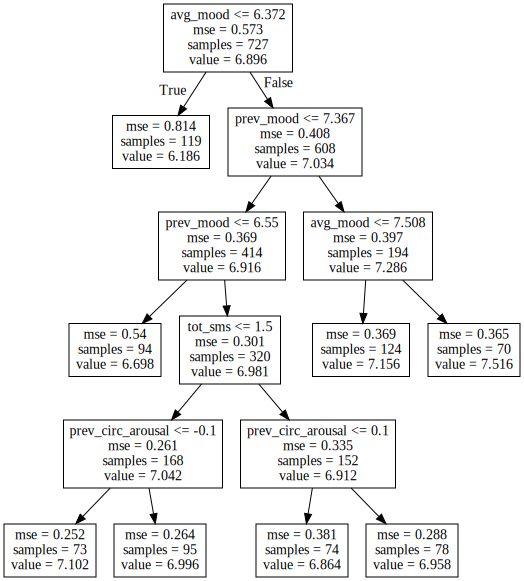

In [17]:
# Display the decision tree regressor as flowchart
import graphviz
from sklearn import tree
f_names = ['prev_mood', 'mood_diff', 'mood_change', 'avg_mood',
           'prev_circ_arousal', 'prev_circ_valence',
           'tot_sms','tot_call',
           'max_app_travel','max_app_finance','max_app_weather','max_app_office',
           'avg_screen','avg_max_activity']
dot_data = tree.export_graphviz(DT_regressor, feature_names=f_names, out_file=None)
#dot_data = tree.export_graphviz(DT_regressor, out_file=None)
graph = graphviz.Source(dot_data)
graph

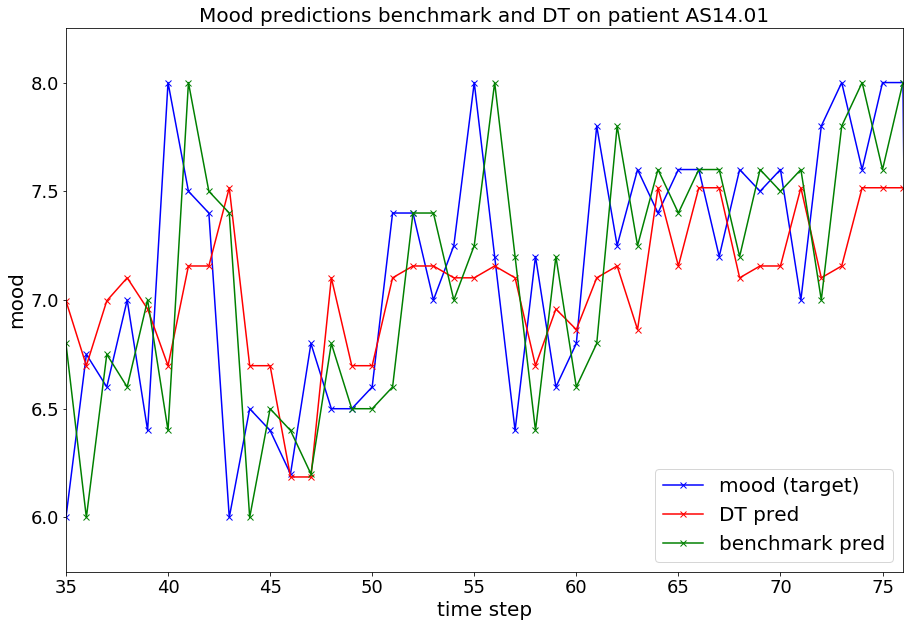

In [18]:
# check for all patients in test set the predictions over time (compared with benchmark)
for test_patient in ['AS14.01']: #'AS14.01' is in the test set "test_patient_ids"
    df_pat_q = create_table_for_patient(df, test_patient)
    f_list_q,t_list_q,time_q = extract_data(df_pat_q)
    q_pred = DT_regressor.predict(f_list_q)

    num_days = df_pat_q.shape[0]
    mood_list_q = np.array(df_pat_q['mood'])
    x = np.arange(0,num_days)
    plt.figure(figsize=(15,10))
    plt.plot(x,mood_list_q,'b',marker='x',label='mood (target)')
    plt.plot(time_q,q_pred,'r',marker='x',label='DT pred')
    z = mood_list_q[0:-1]
    z_x = x[1:]
    plt.plot(z_x,z,'g',marker='x',label='benchmark pred')
    plt.xlim(35,76)
    plt.ylim(5.75,8.25)
    plt.xlabel('time step',size=20)
    plt.ylabel('mood',size=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title("Mood predictions benchmark and DT on patient AS14.01",size=20)
    plt.legend(loc='lower right', fontsize=20)
    plt.show()

MSE on test set benchmark: 0.4695746031746033
MSE on test set DT: 0.40390056549470893
Ttest_indResult(statistic=0.9833883374222926, pvalue=0.32611820007280756)


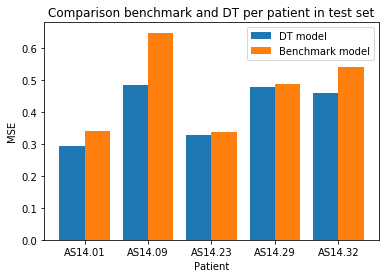

In [19]:
# t-test over 1 patient to see if really difference
from scipy import stats

all_avg_err_benchmark= []
all_avg_err_DT = []
all_err_benchmark = []
all_err_DT = []

# repeat for eacht patient int test set
for test_patient in test_patient_ids:

    # compare whether DT is better then benchmark (over 1 patient):
    # (where DT can predict, benchmark can definityle predict)
    errors_benchmark = []
    errors_DT = []

    df_pat_q = create_table_for_patient(df, test_patient)
    f_list_q,t_list_q,time_q = extract_data(df_pat_q)
    q_pred = DT_regressor.predict(f_list_q)
    mood_list_q = np.array(df_pat_q['mood'])
    
    # only check for times t, in time_q
    for k in range(0,len(time_q)):
        t = time_q[k]
        errors_benchmark.append( (mood_list_q[t] - mood_list_q[t-1])**2 )
        errors_DT.append( (mood_list_q[t] - q_pred[k])**2 )

    avg_err_benchmark = sum(errors_benchmark)/len(errors_benchmark)
    avg_err_DT = sum(errors_DT)/len(errors_DT)
#    print("For patient: " + test_patient)
#    print("avg err benchmark: " + str(avg_err_benchmark))
#    print("avg err DT: " + str(avg_err_DT))

    # t test
#    result = stats.ttest_ind(errors_benchmark, errors_DT,equal_var = False)
#    print(result)
#    print("\n")
    
    all_avg_err_benchmark.append(avg_err_benchmark)
    all_avg_err_DT.append(avg_err_DT)
    all_err_benchmark = all_err_benchmark + errors_benchmark
    all_err_DT = all_err_DT + errors_DT

print("MSE on test set benchmark: " + str(sum(all_err_benchmark)/len(all_err_benchmark)))
print("MSE on test set DT: " + str(sum(all_err_DT)/len(all_err_DT)))
result = stats.ttest_ind(all_err_benchmark, all_err_DT,equal_var = False)
print(result)

# plot of avg errors benchmark vs DT for the test patients
x = np.arange(0,len(all_avg_err_benchmark))
#plt.plot(x,all_avg_err_DT,'r',marker='x', linestyle='None', label='DT model')
#plt.plot(x,all_avg_err_benchmark,'g',marker='x', linestyle='None', label='Benchmark model')
plt.bar(x-0.2,all_avg_err_DT,width=0.4, label='DT model')
plt.bar(x+0.2,all_avg_err_benchmark,width=0.4, label='Benchmark model')
plt.xticks(x,test_patient_ids)
plt.xlabel('Patient')
plt.ylabel('MSE')
plt.title("Comparison benchmark and DT per patient in test set")
plt.legend(loc='upper right')
plt.show()



In [20]:
# Function to check mood over time for each patient

patient_ids = ['AS14.01','AS14.02','AS14.03','AS14.05','AS14.06','AS14.07','AS14.08','AS14.09','AS14.12',
               'AS14.13','AS14.14','AS14.15','AS14.16','AS14.17','AS14.19','AS14.20','AS14.23','AS14.24',
               'AS14.25','AS14.26','AS14.27','AS14.28','AS14.29','AS14.30','AS14.31','AS14.32','AS14.33']
def plot_moods_patients():

    #plt.figure(figsize=(20,10))
    for i in range(0,len(patient_ids)):
        df_table = create_table_for_patient(df, patient_ids[i])
        num_days = df_table.shape[0]
        mood_list = np.array(df_table['mood'])
        x = np.arange(0,num_days)
        plt.figure(figsize=(20,10))
        plt.plot(x,mood_list,marker='x')
        plt.xlabel("time step", size=20)
        plt.ylabel("mood", size=20)
        plt.title("Mood of " + patient_ids[i],size=20)
        plt.show()
    #plt.show()
    
#plot_moods_patients()

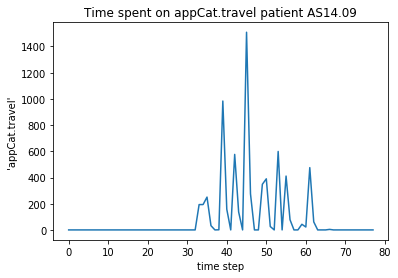

In [21]:
#any other statistics can be checked in here

patient_ids = ['AS14.01','AS14.02','AS14.03','AS14.05','AS14.06','AS14.07','AS14.08','AS14.09','AS14.12',
               'AS14.13','AS14.14','AS14.15','AS14.16','AS14.17','AS14.19','AS14.20','AS14.23','AS14.24',
               'AS14.25','AS14.26','AS14.27','AS14.28','AS14.29','AS14.30','AS14.31','AS14.32','AS14.33']

# example patient AS14.09
df_table = create_table_for_patient(df, 'AS14.09')
num_days = df_table.shape[0]

mood_list = np.array(df_table['mood'])
circ_arousal_list = np.array(df_table['circumplex.arousal'])
circ_valence_list = np.array(df_table['circumplex.valence'])

activity_list = np.array(df_table['activity'])
screen_list = np.array(df_table['screen'])

call_list = np.array(df_table['call'])
sms_list = np.array(df_table['sms'])

app_builtin_list = np.array(df_table['appCat.builtin'])
app_communication_list = np.array(df_table['appCat.communication'])
app_entertainment_list = np.array(df_table['appCat.entertainment'])
app_finance_list = np.array(df_table['appCat.finance'])
app_game_list = np.array(df_table['appCat.game'])
app_office_list = np.array(df_table['appCat.office'])
app_other_list = np.array(df_table['appCat.other'])
app_social_list = np.array(df_table['appCat.social'])
app_travel_list = np.array(df_table['appCat.travel'])
app_unknown_list = np.array(df_table['appCat.unknown'])
app_utilities_list = np.array(df_table['appCat.utilities'])
app_weather_list = np.array(df_table['appCat.weather'])


x = np.arange(0,num_days)

# Example:
plt.plot(x,app_travel_list)
plt.title("Time spent on appCat.travel patient AS14.09")
plt.ylabel("'appCat.travel'")
plt.xlabel("time step")
plt.show()

In [24]:
# Calculation of 4 variables which later are used to to pairwise comparison with temporal model
df_pat_01 = create_table_for_patient(df, 'AS14.01')
df_pat_23 = create_table_for_patient(df, 'AS14.23')

f_list_pat_01,t_list_pat_01,time_pat_01 = extract_data(df_pat_01)
DT_pred_pat_01 = DT_regressor.predict(f_list_pat_01)
f_list_pat_23,t_list_pat_23,time_pat_23 = extract_data(df_pat_23)
DT_pred_pat_23 = DT_regressor.predict(f_list_pat_23)

mood_list_pat_01 = np.array(df_pat_01['mood'])
mood_list_pat_23 = np.array(df_pat_23['mood'])

mood_pat_01_last_10 = mood_list_pat_01[67:77]
mood_pat_23_last_10 = mood_list_pat_23[63:73]

DT_pred_pat_01_last_10 = DT_pred_pat_01[32:42]
DT_pred_pat_23_last_10 = DT_pred_pat_23[23:33]

err_DT_pat_01_last_10 = np.zeros(10)
err_DT_pat_23_last_10 = np.zeros(10)
for k in range(0,10):
    err_DT_pat_01_last_10[k] = (mood_pat_01_last_10[k]-DT_pred_pat_01_last_10[k])**2
    err_DT_pat_23_last_10[k] = (mood_pat_23_last_10[k]-DT_pred_pat_23_last_10[k])**2

    
# These 2 variables now contain the squared errors of prediction for last 10 timesteps on patient 1 and 23    
#   err_DT_pat_01_last_10
#   err_DT_pat_23_last_10


In [23]:
#Model two Cecilia